[*********************100%***********************]  6 of 6 completed

NVDA - Mean: 31.72555407714194, Variance: 879.4088290595146, Skewness: 1.8799515447637285, Kurtosis: 2.771775053485001
QCOM - Mean: 126.97301703457939, Variance: 936.2663736368971, Skewness: 0.30841628608971056, Kurtosis: 0.41681024265575806
AMD - Mean: 100.64815152442841, Variance: 1239.7980894503605, Skewness: 0.6734634798536817, Kurtosis: -0.06924435787548067
INTC - Mean: 41.40178264344977, Variance: 97.54821797940606, Skewness: -0.16579817472043223, Kurtosis: -1.0295164871961084
AAPL - Mean: 146.75708232990115, Variance: 1400.3759766999563, Skewness: -0.3384441409732858, Kurtosis: -0.1559720462213976
AVGO - Mean: 63.05962394896317, Variance: 1313.8634349732774, Skewness: 1.3369858494132896, Kurtosis: 0.9558667114022681


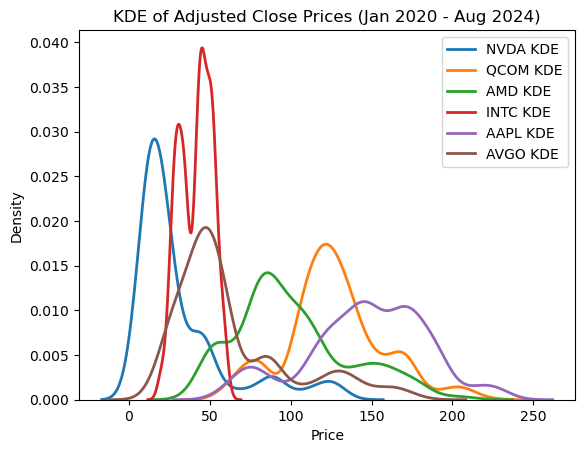

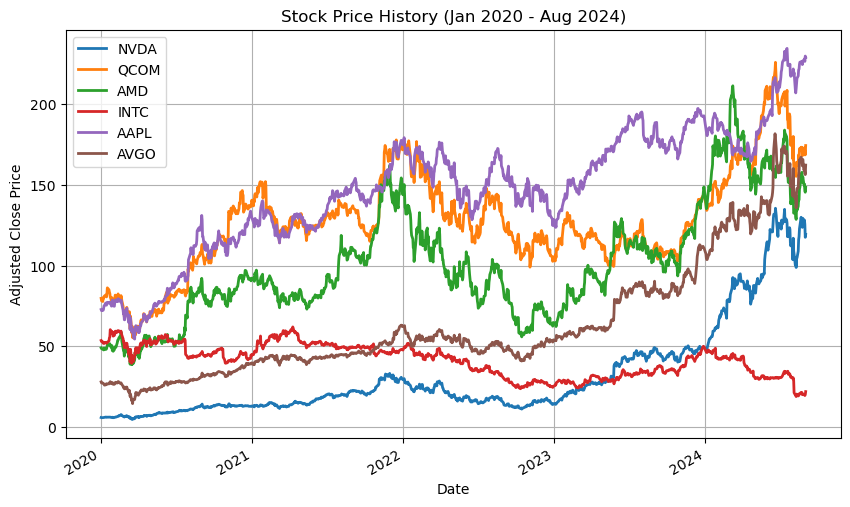

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis


tickers = ['NVDA', 'QCOM', 'AMD', 'INTC', 'AAPL', 'AVGO']


start_date = '2020-01-01'
end_date = '2024-08-31'
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']


for ticker in tickers:
    stock_prices = data[ticker].dropna()
    mean_price = stock_prices.mean()
    variance_price = stock_prices.var()
    skewness_price = skew(stock_prices)
    kurtosis_price = kurtosis(stock_prices)

    print(f"{ticker} - Mean: {mean_price}, Variance: {variance_price}, Skewness: {skewness_price}, Kurtosis: {kurtosis_price}")

    # (KDE)
    sns.kdeplot(stock_prices, label=f'{ticker} KDE', linewidth=2)

plt.title("KDE of Adjusted Close Prices (Jan 2020 - Aug 2024)")
plt.xlabel("Price")
plt.ylabel("Density")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
for ticker in tickers:
    data[ticker].plot(label=ticker, linewidth=2)

plt.title("Stock Price History (Jan 2020 - Aug 2024)")
plt.xlabel("Date")
plt.ylabel("Adjusted Close Price")
plt.legend()
plt.grid(True)
plt.show()